<a href="https://colab.research.google.com/github/Jcnok/Quarentena-de-dados---alura/blob/master/Imersao_dados_4_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importação das bibliotecas
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [207]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [3]:
#visualizando as 5 primeiras linhas.
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
#Visualizando uma amostra de 10 registros.
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2755,NaN,Santa Cecília,São Paulo,455,4,3,1,R$ 5.850.000
5181,NaN,Pinheiros,São Paulo,800,4,7,6,R$ 14.500.000
9655,Rua Guaratuba,Vila Guarani (Z Sul),São Paulo,150,3,2,1,R$ 900.000
1112,Rua Doutor Manoel Maria Tourinho,Pacaembu,São Paulo,380,3,4,3,R$ 2.000.000
7639,NaN,Jardim América,São Paulo,880,4,3,12,R$ 65.000\n /Mês
7267,Rua Maria Inácia da Conceição,Vila Carrão,São Paulo,500,4,5,5,R$ 1.200.000
4737,Rua Grécia,Jardim Europa,São Paulo,280,4,6,4,R$ 4.770.000
6060,NaN,Indianópolis,São Paulo,215,3,1,3,R$ 1.680.000
5315,Rua Pascoal Gomes de Lima,Tremembé,São Paulo,88,3,3,3,R$ 460.000
9334,Rua Francisco José Oliveira,Interlagos,São Paulo,400,4,1,4,R$ 1.650.000


In [ ]:
#informação do tipo de dados e de dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


* **Rua e Bairro possuem valores nulos**

In [4]:
# me mostre o bairro de indice 6522
dados["Bairro"][6522]

'Vila Paulo Silas'

In [ ]:
# me mostre média total da coluna metragem.
dados.Metragem.mean()

442.30065947242207

In [ ]:
# outra forma de vizualizar a metragem.
dados["Metragem"].mean()

442.30065947242207

In [ ]:
# quantidade de imóveis do bairro Vila Mariana
sum((dados["Bairro"] == "Vila Mariana"))

184

In [ ]:
# Vamos conferir se existe esse bairro no conjunto
"Vila Mariana" in dados['Bairro'].values

True

In [ ]:
#Verificando a média por metros do bairro Vila Mariana.
dados.query('Bairro == "Vila Mariana"')['Metragem'].mean()

233.6195652173913

* **Considero esse valor muito alto para média da metragem vamos conferir com mais detalhes**

In [ ]:
#Considero esse valor muito alto para média da metragem vamos conferir com mais detalhes
dados.query('Bairro == "Vila Mariana"')['Metragem'].describe()
# Aparentemente não foge muito desses valores pois a média e mediana estão bem próximos, apesar de existirem alguns valores muito altos.

count    184.000000
mean     233.619565
std       91.467315
min       60.000000
25%      166.000000
50%      235.500000
75%      285.000000
max      650.000000
Name: Metragem, dtype: float64

* **Aparentemente não foge muito desses valores pois a média e mediana estão bem próximos, apesar de existirem alguns valores muito altos.**

In [5]:
# setando um estilo para os gráficos.
sns.set_style("whitegrid", {'axes.grid' : False})

Text(0.5, 1.0, 'Distribuição por metragem(Vila Mariana)')

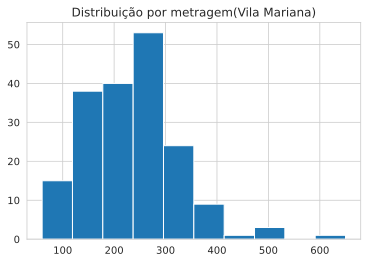

In [6]:
#plotando um histograma para verificarmos como os dados estão distribuídos.
dados.query('Bairro == "Vila Mariana"')['Metragem'].hist()
plt.title('Distribuição por metragem(Vila Mariana)')

* **Fica  mais evidente que temos alguns poucos imóves com metragem acima de 400 metros quadrados. O que também não significa nada, pois nada impede e eu diria que seria até normal eles existirem em uma menor quantidade.**

In [8]:
# var para receber os valores das metragens do bairro Vila Mariana.
vila_mariana = dados.query('Bairro == "Vila Mariana"')['Metragem']


Text(0.5, 1.0, 'Boxplot por metragem(Vila Mariana)')

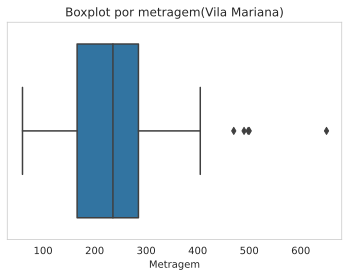

In [9]:
#boxplot para visualizar os outliers.
sns.boxplot(vila_mariana)
plt.title('Boxplot por metragem(Vila Mariana)')

* **Com o gráfico de boxplot podemos visuazar os quartis e outliers de uma forma bem fácil.**
* **Como eu informei, acredito que seja até normal esses poucos imóveis acima de 400 metros, mas para esse estudo eu irei remove-los, pois esses imóveis fojem da classe majoritária e acaba empurrando a média um pouco pra cima, se estivesse vendendo um imóvel nessa região, certamente incluíria os mesmos rs...**

Text(0.5, 1.0, 'Boxplot por metragem(Vila Mariana) sem outliers')

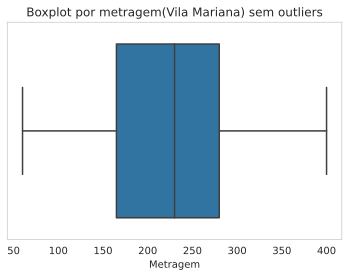

In [10]:
#Boxplot sem outlier
sns.boxplot(vila_mariana[vila_mariana <= 400])
plt.title('Boxplot por metragem(Vila Mariana) sem outliers')

In [13]:
#Removendo os outliers para uma melhor comparação.
vila_mariana_sem_outlier = vila_mariana[vila_mariana <= 400]

In [15]:
# Conforme já previsto a média baixo muito pouco mesmo removendo os outliers.
vila_mariana_sem_outlier.mean()

222.51704545454547

In [16]:
# informações descritivas da metragem do bairro em questão.
vila_mariana_sem_outlier.describe()


count    176.000000
mean     222.517045
std       75.038426
min       60.000000
25%      165.000000
50%      230.000000
75%      280.000000
max      400.000000
Name: Metragem, dtype: float64

* **A média sem outlier ficou em +- 222 metros um pouco abaixo dos  +-233 mt com os outliers.**
* **O desvio padrão baixou de 91 para 75 e a mediana baixou cerca de 5 mts**

In [17]:
# Forma que o professor usou para realizar os filtros, existem várias formas.
tem_imoveis_vila =( dados["Bairro"] == "Vila Mariana")
tem_imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [18]:
# Var para receber o slice
imoveis_vila_mariana = dados[tem_imoveis_vila]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [19]:
# a média dos imóveis da Vila Mariana.
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

In [20]:
# quantidade de imóveis por bairro.
dados["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

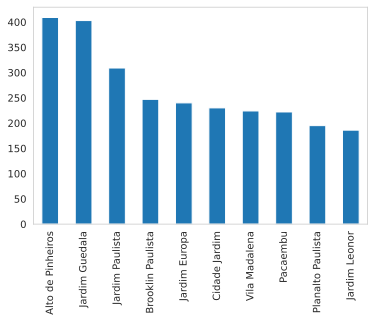

In [21]:
# Plotando uma gráfico de barras dos 10 primeiros bairros com maior número de imóveis.
n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

In [23]:
# criando um dataframe com as quantidade por bairro
bairros = dados['Bairro'].value_counts().to_frame()
#bairros.index.to_list() # conferindo todos os nomes dos bairros.

Text(0.5, 1.0, 'Os 10 bairros com maior número de imóveis')

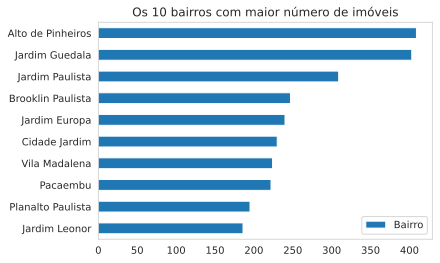

In [25]:
#Plotando os 10 primeiros bairros que possuem mais imóveis - prefiro o gráfico de barras horizontal para uma melhor comparação.
bairros[0:10].sort_values(by='Bairro',ascending=True).plot.barh()
plt.title('Os 10 bairros com maior número de imóveis')

Desafios:

1 - Realizar a média da metragem para cada um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

## 1 - Realizar a média da metragem para cada um dos bairros (Paulo)

In [ ]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [26]:
#var com o nome de todos os bairros.
indice_bairros = bairros.index
len(indice_bairros) # Quantidade distinta de bairros.

701

In [ ]:
#for para tirar todas as médias e armazenar em um dataframe.
lista_medias = []
for i in range(len(indice_bairros)):
  #print(indice_bairros[i])
  #Verificando a média por metros do bairro Vila Mariana.
  x = indice_bairros[i]
  média = dados.query(f'Bairro == "{x}"')['Metragem'].mean()
  lista_medias.append([x,round(média,2)])
  print(f'A média da metragem do bairro {x} é de: {round(média,2)} metros quadrados')
df_medias_bairros = pd.DataFrame(lista_medias,columns=['bairro','média_m2'])

In [209]:
#Dataset com a média das metragens de todos os bairros.
#consulta de uma amostra de 10 registro.
df_medias_bairros.sample(10)

,bairro,média_m2
620,Jardim Benfica,48.00
359,Vila Babilônia,153.00
23,Jardim Luzitânia,490.73
688,Balneário Mar Paulista,250.00
98,Vila Congonhas,246.11
525,Vila Aricanduva,500.00
36,Interlagos,388.12
684,Vila Bandeirantes,120.00
370,Bortolândia,151.67
501,Jardim Maringá,276.50


* **São 701 bairros, eu até imprimi as respostas, mas preferi colocar o resultado em um dataset para melhor manipulação e inferência de alguns dados.**

In [210]:
df_medias_bairros.describe()

,média_m2
count,701.000000
mean,285.448231
std,1403.268014
min,10.000000
25%,135.440000
50%,184.450000
75%,265.500000
max,37000.000000


In [211]:
menor = df_medias_bairros.query('média_m2 == 10')
maior = df_medias_bairros.query('média_m2 == 37000')

In [212]:
# Qual o bairro com menor e o com maior média em metros quadrados?
print(f'O bairro com menor média em m2:{menor.bairro.values} com média de:{menor.média_m2.values}m2\n')
print(f'O bairro com maior média em m2:{maior.bairro.values} com média de:{maior.média_m2.values}m2\n')

O bairro com menor média em m2:['Vila Guaca'] com média de:[10.]m2

O bairro com maior média em m2:['Sítio Represa'] com média de:[37000.]m2



* **Temos que investigar, pois esses dados me parecem fora da realidade, não estou morando em Tokyo, no caso da Vila Guaca rs....**
* **Por outro lado caraca rs, um bairro com média de 37mil metros quadrados.....**
* **No primeiro caso acredito que algum erro de digitação.**
* **Já no segundo, talvez só tenha um imóvel nesse bairro, que por sinal, o próprio nome já é suspeito "Sítio Represa"**

**Vamos ter de investigar....**

In [213]:
dados.query('Bairro == "Vila Guaca"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,R$ 800.000


In [214]:
df_medias_bairros.query('bairro == "Vila Guaca"')

,bairro,média_m2
522,Vila Guaca,10.0


* **O que acham?**
* **Minha conclusão é que foi um erro de digitação, porque dentro desses 10m2, seria impossível caber 3 quartos, 2 banheiros e 2 vagas de garagem rs...**
* **Nesse caso, apenas por questão de estudo irei alterar essa metragem para 100m2 que para mim faz mais sentido.**

In [215]:
dados['Metragem'].iloc[9603] = 100.0
df_medias_bairros['média_m2'].iloc[522] = 100.0

In [216]:
dados.query('Bairro == "Vila Guaca"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9603,Rua Pestana,Vila Guaca,São Paulo,100,3,2,2,R$ 800.000


In [217]:
df_medias_bairros.query('bairro == "Vila Guaca"')

,bairro,média_m2
522,Vila Guaca,100.0


In [175]:
#Verificando os registros do bairro em questão.
dados.query('Bairro == "Sítio Represa"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


* **Faz todo sentido, é um sítio de 37000m2, pesquisei no mapa, e muito provávelente é um dado real e sem erros.**

In [218]:
#Vamos verificar agora como ficou!
df_medias_bairros.describe()

,média_m2
count,701.000000
mean,285.576619
std,1403.246894
min,46.000000
25%,135.440000
50%,184.450000
75%,265.500000
max,37000.000000


* **Agora pelo menos para metragem faz mais sentido a menor média ficar em 46m2 - dentro da realidade pelo menos**

## 2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [ ]:
# Lista com todos os bairros.
lista_bairros = dados['Bairro'].unique()

In [ ]:
# Filtro por índice por lista - ideal para usar um for
dados.loc[dados['Bairro']== lista_bairros[0]]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,R$ 2.190.000
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,R$ 1.390.000
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,R$ 670.000
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,R$ 2.014.000
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,R$ 680.000
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,R$ 1.550.000
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,R$ 1.500.000
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000


In [221]:
#Filtro direto pelo nome usando booleano
dados[dados['Bairro'] == "Sítio Represa"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


In [222]:
#Filtro por query estilo sql - acho esse método mais fácil
dados.query('Bairro == "Sítio Represa"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000



## 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)



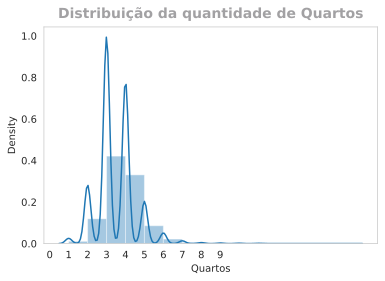

In [226]:
bins = np.arange(min(dados.Quartos), max(dados.Quartos))
p = sns.distplot(dados.Quartos, bins=bins)
plt.xticks(range(0,10))
p.set_title("Distribuição da quantidade de Quartos",
             fontsize=14, color='#A2A1A3',
             verticalalignment='bottom',
             weight='bold')
plt.show();

* **Existem algums imóveis com mais de 6 quartos vamos veriricar....**

In [227]:
# qual número máximo de quartos em um imóvel?
max(dados.Quartos)

16

In [228]:
#verificando alguns dados estatísticos do conjunto.
dados.describe() # possíveis valores incorretos, pois ao observamos os valores máximos é possível perceber muitos valores discrepantes.

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.309652,3.483114,3.879097,4.097222
std,7515.378926,1.064200,1.988467,2.824014
min,20.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


* **Vamos analisar esses valores discrepantes....**

In [231]:
# Filtro para registros maiores que 12 quartos.
dados.query('Quartos > 12')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1726,NaN,Jardim Paulista,São Paulo,450,13,7,7,R$ 13.000.000
9609,Avenida Doutor Altino Arantes,Vila Clementino,São Paulo,480,15,8,12,R$ 20.000\n /Mês
9711,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,280,16,3,3,R$ 790.000
9747,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,285,16,3,3,R$ 790.000


* **Não vejo muito sentido um imóvel com somente 280m2 possuir 16 quartos, 3 banheiros 3 somente 3 vagas, um albergue talvez...**
* **Vamos remover esse dois registros e ver como fica o gráfico.

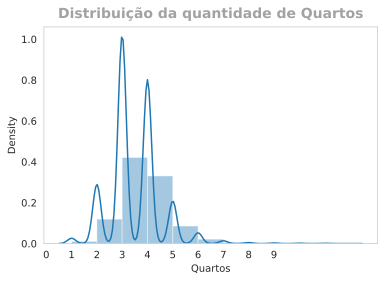

In [233]:
quarto_sem_outliers = dados.query('Quartos < 13')
bins = np.arange(min(quarto_sem_outliers.Quartos), max(quarto_sem_outliers.Quartos))
p = sns.distplot(quarto_sem_outliers.Quartos, bins=bins)
plt.xticks(range(0,10))
p.set_title("Distribuição da quantidade de Quartos",
             fontsize=14, color='#A2A1A3',
             verticalalignment='bottom',
             weight='bold')
plt.show()

* **Não notei muita diferença, pois foram apenas 2 registros.**

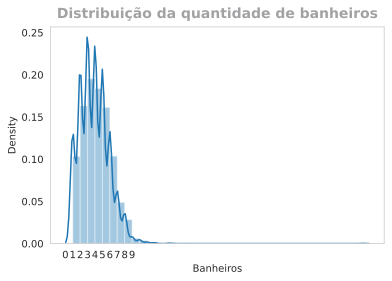

In [234]:
# Vamos plotar gráfico de quantidade de banheiros.
bins = np.arange(min(dados.Banheiros), max(dados.Banheiros))
p = sns.distplot(dados.Banheiros, bins=bins)
plt.xticks(range(0,10))
p.set_title("Distribuição da quantidade de banheiros",
             fontsize=14, color='#A2A1A3',
             verticalalignment='bottom',
             weight='bold')
plt.show()

In [235]:
# Nossa existe uma mansão com 40 banheiros, vamos entender do que se trata.
max(dados.Banheiros)


40

* **Esse Prédio de 40 banheiros está complicado, vamos verificar...**

In [236]:
#Certamente um erro de digitação, pois impossível um imóvel menor do que 500 m e com 4 quartos possuirem 40 banheiros, precisamos corrigir isso.
# Mesmo que fosse um escritório ou um comércio não faria sentido.
dados.query('Banheiros > 15')


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000
2513,NaN,Vila Tramontano,São Paulo,1650,6,16,42,R$ 100.000\n /Mês


* **Ai me complica rs... um imóvel menor que 500m2 com 4 quartos possuir 40 banheiros....**
* **Na minha opnião, foi erro de digitação, eram 4 e acabaram acrescentando um 0 rs..**
* **Estou achando que existem muitos dados repetidos, onde fizeram apenas um leve alteração na coluna Metragem... humm...**
* **Poderia imputar algum valor, nos casos de erro de digitação poderiamos atribuir 4 banheiros, mas nesse primeiro momento irei remover esses dados.**

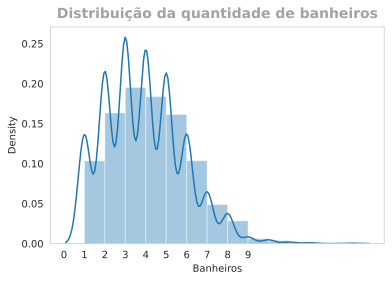

In [238]:
#poderia imputar algum valor, em caso de erro de digitação poderiamos atribuir 4 banheiros, mas nesse primeiro momento irei remover esses dados.
corte_banheiros_outliers = dados.query('Banheiros < 15')
bins = np.arange(min(corte_banheiros_outliers.Banheiros), max(corte_banheiros_outliers.Banheiros))
p = sns.distplot(corte_banheiros_outliers.Banheiros, bins=bins)
plt.xticks(range(0,10))
p.set_title("Distribuição da quantidade de banheiros",
             fontsize=14, color='#A2A1A3',
             verticalalignment='bottom',
             weight='bold')
plt.show()

* **Muito melhor agora não acham?**

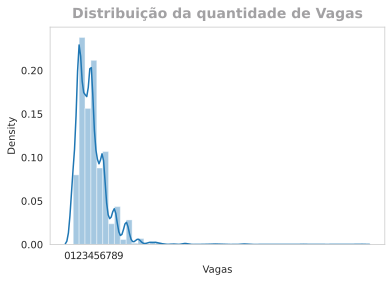

In [239]:
#Plot com o número de vagas.
bins = np.arange(min(dados.Vagas), max(dados.Vagas))
p = sns.distplot(dados.Vagas, bins=bins)
plt.xticks(range(0,10))
p.set_title("Distribuição da quantidade de Vagas",
             fontsize=14, color='#A2A1A3',
             verticalalignment='bottom',
             weight='bold')
plt.show()


In [240]:
dados.Vagas.max()

50

In [244]:
dados.query('Vagas > 40')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2513,NaN,Vila Tramontano,São Paulo,1650,6,16,42,R$ 100.000\n /Mês
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000


* **Aqui não há muito o que fazer, pode ser um comércio, um prédio, sítio até mesmo um estacionamento.**

## 4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [245]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.309652,3.483114,3.879097,4.097222
std,7515.378926,1.064200,1.988467,2.824014
min,20.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


## 5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [246]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [262]:
#Bairros que não possuem nomes na colua Rua.
dados[dados['Rua'].isnull()]['Bairro'].unique()
dados[dados['Rua'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000
